
# THE SPARKS FOUNDATION

## DATA SCIENCE AND BUSINESS ANALYTICS JUNE'**21**

AUTHOR : VADDI JASWANTH REDDY

Task: 1
Prediction using Supervised ML Objective: From given dataset, predict the percentage of an student based on the no. of study hours.

Dataset: http://bit.ly/w-data

IMPORTING LIBRARIES

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

IMPORTING DATA

In [2]:
# Loading Dataset
df = pd.read_csv("http://bit.ly/w-data")
print("Data Imported")
# Printing the first 10 rows of the dataset
df.head(10)

Data Imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


EXPLORE THE DATA

In [3]:
# Checking for NaN Values

df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [4]:

# Getting to know more about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.shape


(25, 2)

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


VISUALIZE THE DATA

In [8]:
import matplotlib.pyplot as plt

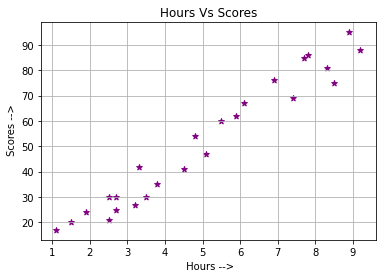

In [9]:
plt.scatter(df.Hours, df.Scores,color = "purple", marker="*")
plt.title("Hours Vs Scores")
plt.xlabel(" Hours -->")
plt.ylabel(" Scores -->")
plt.grid()
plt.show()


From above graph, it's very much clear that Hours and Scores have a linear relation. Thus, a linear regression model will be a perfect fit for solving this problem.
Preparing the data
Here we are using train_test_split() to divide the data, assigning 20% of data for Testing while the remaining 80% data is for Training.

In [10]:

train = df.iloc[:, :-1].values  
test = df.iloc[:, 1].values

In [11]:
# Using train_test_split() method

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train,test, test_size = 0.2, random_state = 0)



Building and Training the Model

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train,test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print ("Coefficient:-", regressor.coef_)
print ("Intercept:-", regressor.intercept_)

Coefficient:- [9.77580339]
Intercept:- 2.48367340537321


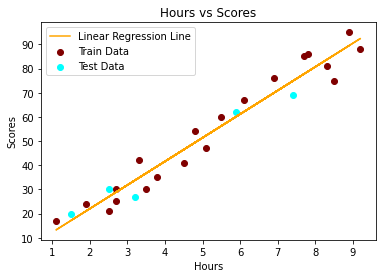

In [14]:
# defining regression line
line = regressor.coef_*train+regressor.intercept_

# plotting for the test data
plt.scatter(X_train, y_train, label='Train Data',color='maroon')
plt.scatter(X_test, y_test, label='Test Data',color='aqua')

plt.plot(train, line, color='orange', label='Linear Regression Line')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')

plt.legend()
plt.show()

Actual vs Predicated

In [15]:
Y_pred = regressor.predict(X_test)
print(Y_pred)

[17.14737849 33.76624426 74.8246185  26.92318188 60.16091341]


In [16]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':Y_pred})
df

,Actual,Predicted
0,20,17.147378
1,27,33.766244
2,69,74.824618
3,30,26.923182
4,62,60.160913


Testing Model Fit

In [17]:
# Training and Testing Score
print("Training Score: ", regressor.score(X_train, y_train))
print("Testing Score: ", regressor.score(X_test,y_test))

Training Score:  0.9512837351709387
Testing Score:  0.9491748734859172


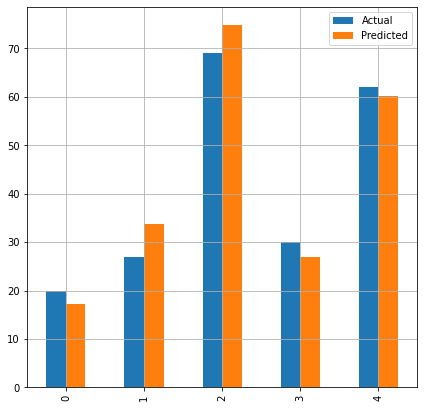

In [18]:
df.plot(kind='bar',figsize=(7,7))
plt.grid()
plt.show()

In [19]:
# Testing with our own data

hours = 9.25
pred_score = regressor.predict([[9.25]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred_score[0]))

No of Hours = 9.25
Predicted Score = 92.9098547701573


Conclusion: For 9.25 hrs/day of study, student will score 92.9 i.e. 93 Marks

In [20]:
from sklearn import metrics

print(" Mean Absolute Error:-", metrics.mean_absolute_error(y_test, Y_pred))
print(" Mean Squared Error:-",metrics.mean_squared_error(y_test,Y_pred))
print(" Root Mean Squared Error:-",np.sqrt(metrics.mean_squared_error(y_test,Y_pred)))
print(" Explained Variance Score:-",metrics.explained_variance_score(y_test,Y_pred))
print(" R-2:-", metrics.r2_score(y_test, Y_pred))

 Mean Absolute Error:- 4.071877793635605
 Mean Squared Error:- 20.138948129940175
 Root Mean Squared Error:- 4.487643939746131
 Explained Variance Score:- 0.9515224335188082
 R-2:- 0.9491748734859172
